In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
electric = pd.read_csv("~/Downloads/Full Eletric Interval 042016.csv", skiprows = 4)
propertyCode = pd.read_excel("~/Downloads/SIMS_Property_List_4-6-2016.xlsx")

In [3]:
electric = pd.read_csv("~/Downloads/Full Eletric Interval 042016.csv", skiprows = 4)
propertyCode = pd.read_excel("~/Downloads/SIMS_Property_List_4-6-2016.xlsx")

#### Getting list of all codes

In [5]:
codelist = [b[0] for b in electric['Meter'].str.split()]
codes = pd.Series(codelist)

#### Getting unique codes

In [6]:
unicodes = codes.unique()
unicodes = pd.Series(unicodes)

In [12]:
#enter building type as parameter: dorm, dormitory, lab, laboratory, etc
def typeCA(bldtype):
    blduse = propertyCode[propertyCode['Building Use'].str.contains(bldtype, na=False)]
    bldcode = pd.Series([(b[0]) for b in blduse['Property Code'].str.split()])
    ubldcode = bldcode.unique()
    newdf = electric[codes.isin(bldcode)]
    newdf = newdf.reset_index(drop=True)
    newcode = pd.Series([b[0] for b in newdf['Meter'].str.split()])
    unewcode = newcode.unique()
    unewcode.sort()
    cmltv = []
    for i in unewcode:
        cmltv.append(newdf.Usage[newcode.isin([i])].sum())
    cmltv = pd.Series(cmltv)
    nalst = []
    for i in unewcode:
        nalst.append(propertyCode[propertyCode['Property Code'].isin([i])]['FCIM Gross Area'])
    narea = pd.DataFrame(nalst).sum(axis=1)
    narea = narea.reset_index(drop=True)
    usageNA = cmltv.divide(narea)
    ndata = {'Meter': unewcode, 'Cumulative Usage/area': usageNA}
    finaldf = pd.DataFrame(ndata)
    finaldf = finaldf.reset_index(drop=True)
    finaldf.plot(x='Meter', y='Cumulative Usage/area', kind='bar')
    plt.ylabel('Usage (kWh/m^2)')
    plt.title(bldtype)

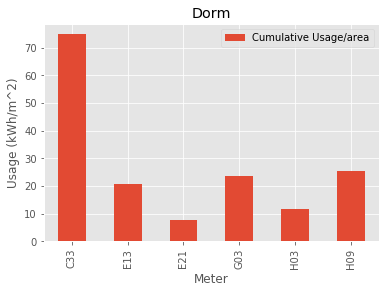

In [13]:
typeCA("Dorm")